In [201]:
import matplotlib.pyplot as plt
from numpy import * 
from sympy import *
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
from sklearn  import * 
from scipy.optimize import curve_fit
%matplotlib inline

- Задание 1

Вычислите производную функции в точке х = 1




In [202]:
x = Symbol('x')

In [203]:
diff = diff(tan(sin(x) + cos(2 * x + 3))** 2).evalf(subs = {'x': 1})

round(diff, 2)

55.39

- Задание 2


Дан объект в 2D пространстве

При помощи матричных операций выполните:


Смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1.2)

(-200.0, 200.0)

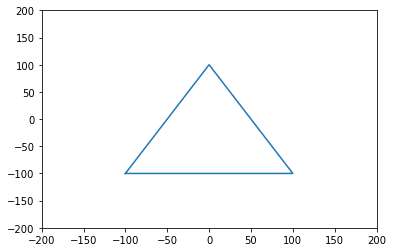

In [210]:
A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [211]:
B =  [[0.5, 0, 0], [0, 1.2, 0], [0, 0, 1]]
B = np.array(B)


In [222]:
res = B @ A.transpose()
result = res.transpose()
A = np.array(result)


(-200.0, 200.0)

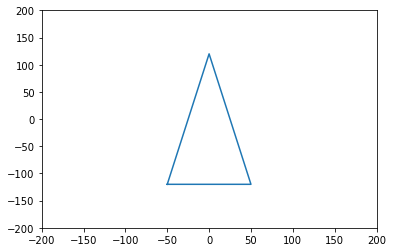

In [223]:
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [224]:

A2 = A + [200, 300, 0]

(100.0, 500.0)

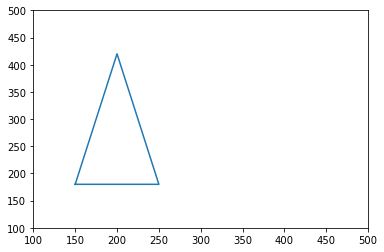

In [225]:
x = A2[:, 0]
y = A2[:, 1]
plt.plot(x, y)
plt.ylim([100, 500])
plt.xlim([100, 500]) 

- Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [226]:
m = np.array([[1, 4],
              [1, 1]])
m

array([[1, 4],
       [1, 1]])

In [227]:
np.linalg.eig(m)

(array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))

- Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x.


Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [228]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [229]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

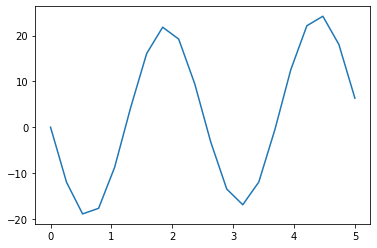

In [230]:
plt.plot(x, fx)
plt.show()

In [231]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [232]:
res  =  minimize(error,  [0,0],  method = 'COBYLA')
np.around(res.x, 2)

array([ 3. , -2.5])

- Задание 5


Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [233]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [234]:
metrics.pairwise.cosine_similarity(raitings)

array([[1.        , 0.82602919, 0.84921529, 0.78340116, 0.81917632,
        0.74118548, 0.72735828, 0.80967522, 0.91065982, 0.86010776],
       [0.82602919, 1.        , 0.81234325, 0.84635337, 0.87138052,
        0.82713107, 0.82629684, 0.80026003, 0.82526308, 0.81968127],
       [0.84921529, 0.81234325, 1.        , 0.84669374, 0.78394299,
        0.79097985, 0.67616223, 0.76289552, 0.82112077, 0.91873051],
       [0.78340116, 0.84635337, 0.84669374, 1.        , 0.69153409,
        0.78665792, 0.83274211, 0.82934667, 0.7770666 , 0.8588687 ],
       [0.81917632, 0.87138052, 0.78394299, 0.69153409, 1.        ,
        0.7764434 , 0.78200468, 0.81236869, 0.87948477, 0.84574789],
       [0.74118548, 0.82713107, 0.79097985, 0.78665792, 0.7764434 ,
        1.        , 0.74011801, 0.84451685, 0.80622876, 0.85514908],
       [0.72735828, 0.82629684, 0.67616223, 0.83274211, 0.78200468,
        0.74011801, 1.        , 0.82669174, 0.81130044, 0.79154718],
       [0.80967522, 0.80026003, 0.7628955

In [243]:
for i, vector in enumerate(pairwise_distances(raitings, metric = "cosine")):
    print(i, list(vector).index(np.min(vector[np.nonzero(vector)])))


0 8
1 4
2 9
3 9
4 8
5 9
6 3
7 5
8 0
9 2
